In [558]:
import pandas as pd
import numpy as np
import datetime as DT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [559]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [560]:
T = test.iloc[:,1:].values

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [120.,  21.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [561]:
train.head()

,person,cantidad_eventos (Enero),Brazil (Enero),Unknown_country (Enero),United States (Enero),Argentina (Enero),Canada (Enero),France (Enero),Uruguay (Enero),Italy (Enero),...,Ametista_checkouts_conversiones (Mayo)_y,Cinza_checkouts_conversiones (Mayo)_y,Ouro_checkouts_conversiones (Mayo)_y,Preto Brilhante_checkouts_conversiones (Mayo)_y,Bom_conversiones (Mayo)_y,Excelente_conversiones (Mayo)_y,Muito Bom_conversiones (Mayo)_y,Bom - Sem Touch ID_conversiones (Mayo)_y,Novo_conversiones (Mayo)_y,label
0,0566e9c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,6ec7ee77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,abe7a2fb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,34728364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,87ed62de,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Submuestreo

In [562]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(train[train['label'] == 1])

In [563]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = train[train.label == 0].index 

In [564]:
#Muestras aleatorias de índices de no conversiones,con una semilla cualquiera
np.random.seed(123)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [565]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = train[train.label == 1].index

In [566]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [567]:
#6 Obtener Balance Dataframe
under_sample = train.loc[under_sample_indices]

In [568]:
under_sample = under_sample.sort_values(by="person")

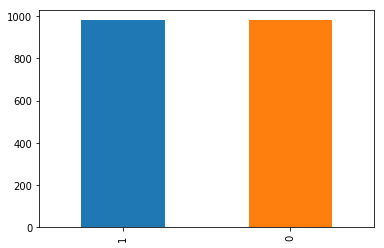

In [569]:
import matplotlib.pyplot as plt
under_sample['label'].value_counts().plot(kind='bar')

In [570]:
X = under_sample.iloc[:,1:-1].values
y = under_sample['label'].values

In [627]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_train, X_test, y_train, y_test =\
train_test_split(X,y,test_size = 0.05,shuffle = False,random_state= 123)

In [628]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
T_std = sc.transform(T)

In [629]:
#ppn con todos los features
ppn = Perceptron( )
ppn.fit(X_train_std,y_train)

/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [630]:
pred = ppn.predict(X_test_std)
print('accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred)*100))

accuracy: 59.18%


In [631]:
prediccion = ppn.predict(T_std)
prediccion.mean()

0.5972186453772856

In [632]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print(recall_score(y_test, pred))
print(accuracy_score(y_test, pred))

0.782608695652174
0.5918367346938775


In [639]:
test["label"] = prediccion
perceptron1 = test[["person","label"]]

In [640]:
perceptron1.to_csv("subPerceptron.csv",index = False)